Task 1 Header1

header 1

In [ ]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from pandas import DataFrame, Series
from warnings import filterwarnings
filterwarnings('ignore')

header 2

In [ ]:
#reading dataset and examining first few records
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['pokemon.csv']))
df



Saving pokemon.csv to pokemon.csv


,Unnamed: 0,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,NaN,0.519051
796,797,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,NaN,0.519051
797,798,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,NaN,0.400652
798,799,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,NaN,0.400652


In [ ]:
df.head(10)

,Unnamed: 0,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195
5,6,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0.53,0.441195
6,7,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0.83,0.441195
7,8,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0.86,0.441195
8,9,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0.85,0.441195
9,10,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0.17,0.495605


In [ ]:
df.tail(10)

,Unnamed: 0,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
790,791,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False,NaN,0.497487
791,792,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False,NaN,0.497487
792,793,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,NaN,0.363225
793,794,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,NaN,0.489887
794,795,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,NaN,0.522461
795,796,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,NaN,0.519051
796,797,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,NaN,0.519051
797,798,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,NaN,0.400652
798,799,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,NaN,0.400652
799,800,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,NaN,0.441195


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df[df['Legendary']==True]  #Showing the legendary pokemons


,Unnamed: 0,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
156,157,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,0.63,0.463466
157,158,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,0.75,0.444901
158,159,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,0.68,0.441195
162,163,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,0.90,0.400652
163,164,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,0.95,0.400652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,NaN,0.519051
796,797,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,NaN,0.519051
797,798,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,NaN,0.400652
798,799,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,NaN,0.400652


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      800 non-null    int64  
 1   X.              800 non-null    int64  
 2   Name            800 non-null    object 
 3   Type.1          800 non-null    object 
 4   Type.2          414 non-null    object 
 5   Total           800 non-null    int64  
 6   HP              800 non-null    int64  
 7   Attack          800 non-null    int64  
 8   Defense         800 non-null    int64  
 9   Sp..Atk         800 non-null    int64  
 10  Sp..Def         800 non-null    int64  
 11  Speed           800 non-null    int64  
 12  Generation      800 non-null    int64  
 13  Legendary       800 non-null    bool   
 14  Win_rate        706 non-null    float64
 15  Type1_Win_rate  800 non-null    float64
dtypes: bool(1), float64(2), int64(10), object(3)
memory usage: 94.7+ KB


In [ ]:
print('The unique types are',df['Type.1'].unique()) #unique types
print('The total no of unique types are',df['Type.1'].nunique()) #count
print(df['Type.1'].value_counts(), '\n' ,df['Type.2'].value_counts())#different types
print('The total generations are',df['Generation'].unique())


The unique types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The total no of unique types are 18
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type.1, dtype: int64 
 Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type.2, dtype: int64
The total generations are [1 2 3 4 5 6]


In [ ]:
print("Max HP:",df['HP'].argmax())  # highest HP
print("Max Defense:",(df['Defense']).argmax()) #highest defense


Max HP: 261
Max Defense: 224


In [ ]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.rename(columns={'X.': 'cd'}, inplace=True)
df.head(10)

,id,cd,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195
5,6,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0.53,0.441195
6,7,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0.83,0.441195
7,8,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0.86,0.441195
8,9,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0.85,0.441195
9,10,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0.17,0.495605


header 3

In [ ]:
df.shape

(800, 16)

header 4

In [ ]:
df = df.drop('id', 1)
df = df.drop('cd', 1)
df.head(10)


,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0.53,0.441195
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0.83,0.441195
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0.86,0.441195
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0.85,0.441195
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0.17,0.495605


header 5

In [ ]:
#listing which columns contain categorical and quantitative data
categorical_columns=[i for i in df.columns if df.dtypes[i]=='object']
categorical_columns



['Name', 'Type.1', 'Type.2']

In [ ]:
quantitative_columns=[i for i in df.columns if df.dtypes[i]!='object']
quantitative_columns


['Total',
 'HP',
 'Attack',
 'Defense',
 'Sp..Atk',
 'Sp..Def',
 'Speed',
 'Generation',
 'Legendary',
 'Win_rate',
 'Type1_Win_rate']

Task 2 Header 2

header 1

In [ ]:
df.isnull().sum(axis = 0)
df.isnull().sum().sort_values(ascending = True)




Name                0
Type.1              0
Total               0
HP                  0
Attack              0
Defense             0
Sp..Atk             0
Sp..Def             0
Speed               0
Generation          0
Legendary           0
Type1_Win_rate      0
Win_rate           94
Type.2            386
dtype: int64

header 2

In [ ]:
#Good approach to treat null values is give them values like 'does not exist'.In this dataset win_rate null values are already entered as N/A , we modify Type.2 null values as does not exist
df['Type.2'].fillna(value='does not exist', inplace=True)
df['Win_rate'].fillna(value='na', inplace=True)
df.head(10)
df.tail(10)



,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False,na,0.497487
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False,na,0.497487
792,Xerneas,Fairy,does not exist,680,126,131,95,131,98,99,6,True,na,0.363225
793,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,na,0.489887
794,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,na,0.522461
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,na,0.519051
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,na,0.519051
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,na,0.400652
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,na,0.400652
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,na,0.441195


header 3

In [ ]:
df.describe()

,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Type1_Win_rate
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.471075
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.043434
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.363225
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.446002
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.481159
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.495605
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,0.555501


bonus

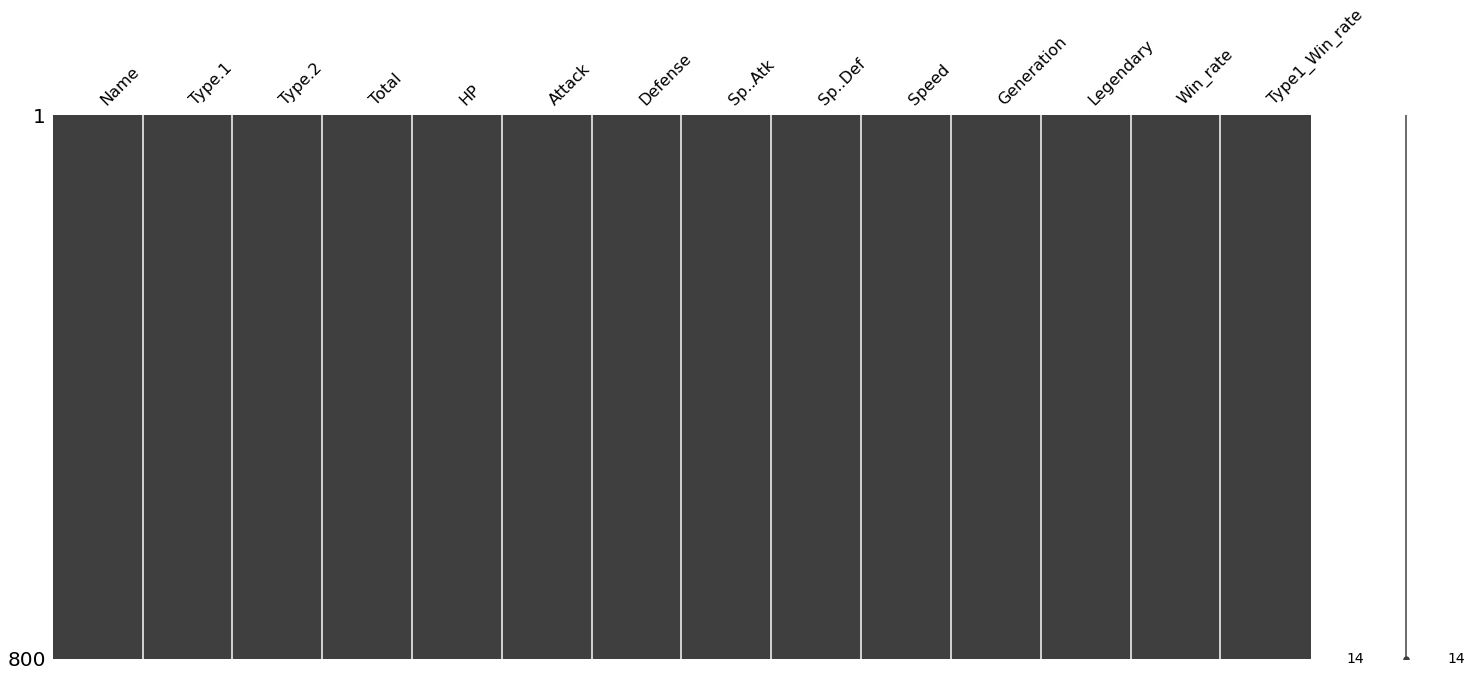

In [ ]:
msno.matrix(df)


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


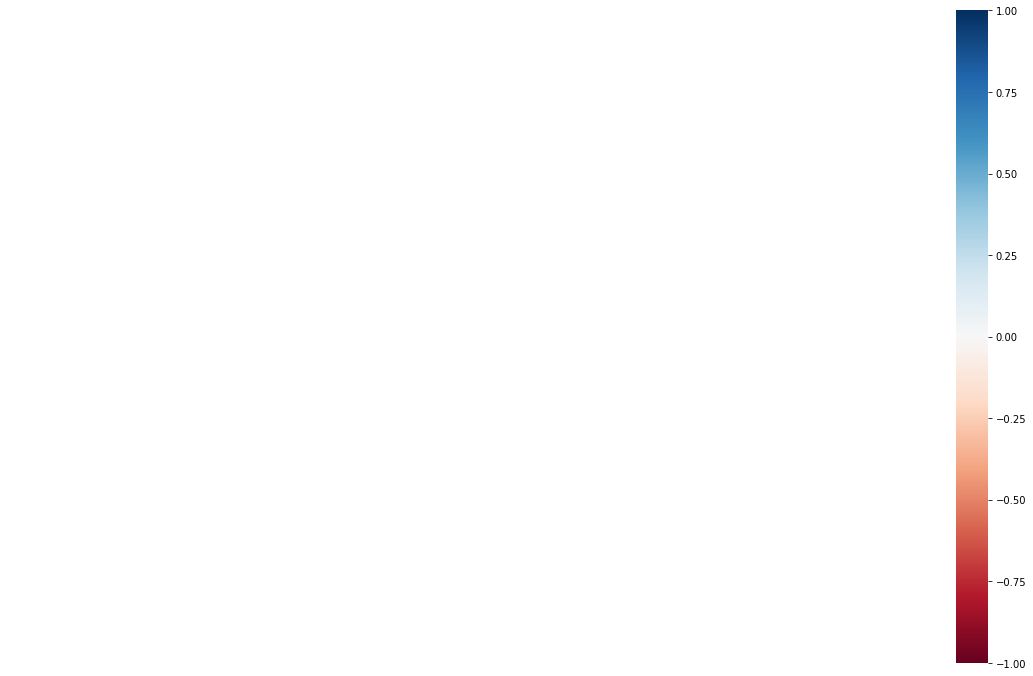

In [ ]:
msno.heatmap(df)


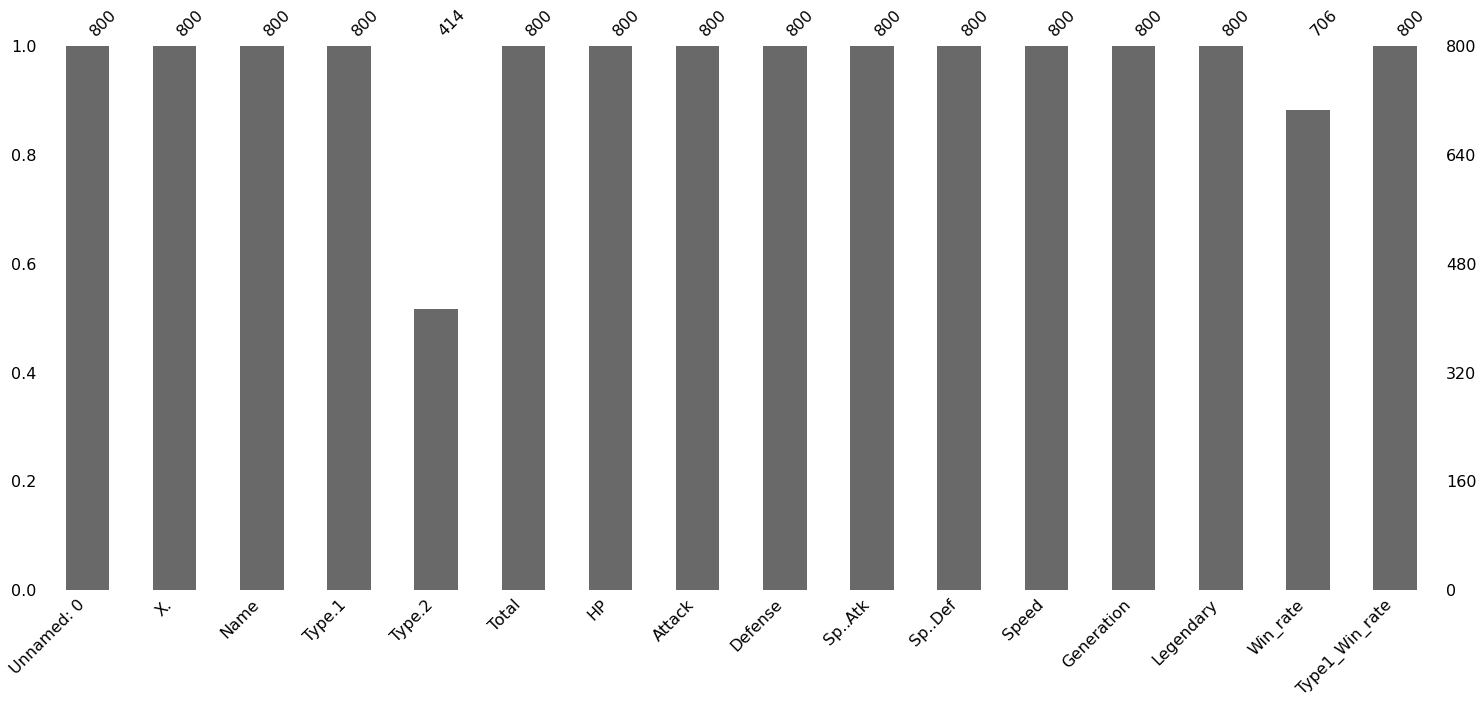

In [ ]:
msno.bar(df)


Task 3 Header 3

header 1

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type.1, dtype: int64


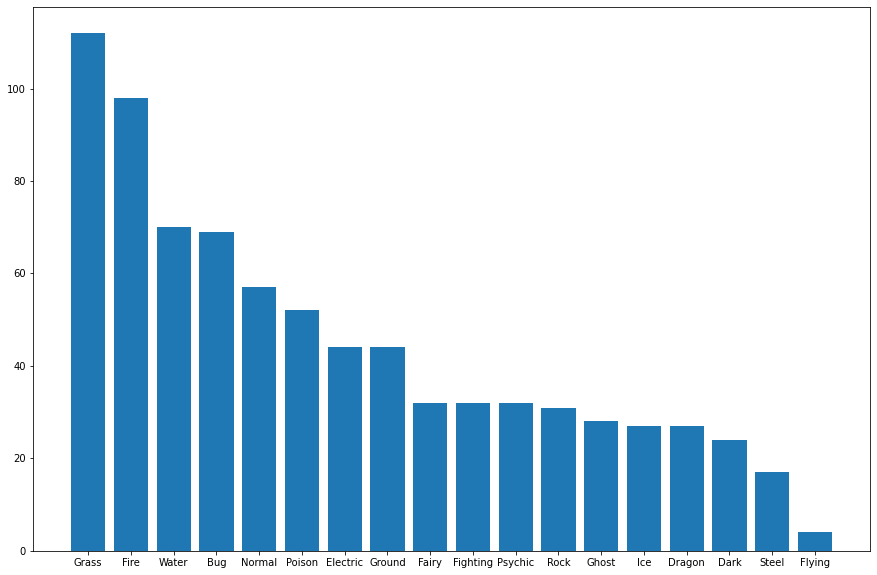

In [ ]:
# categorial variables (Type.1)
fig, ax = plt.subplots(figsize=(15,10))

X= df['Type.1'].unique() 
Y= df['Type.1'].value_counts()

print(X, Y)

ax.bar(X,Y)
plt.show()

['Poison' 'does not exist' 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass'
 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric'
 'Fire' 'Ghost' 'Bug' 'Normal'] does not exist    386
Flying             97
Ground             35
Poison             34
Psychic            33
Fighting           26
Grass              25
Fairy              23
Steel              22
Dark               20
Dragon             18
Water              14
Ice                14
Ghost              14
Rock               14
Fire               12
Electric            6
Normal              4
Bug                 3
Name: Type.2, dtype: int64


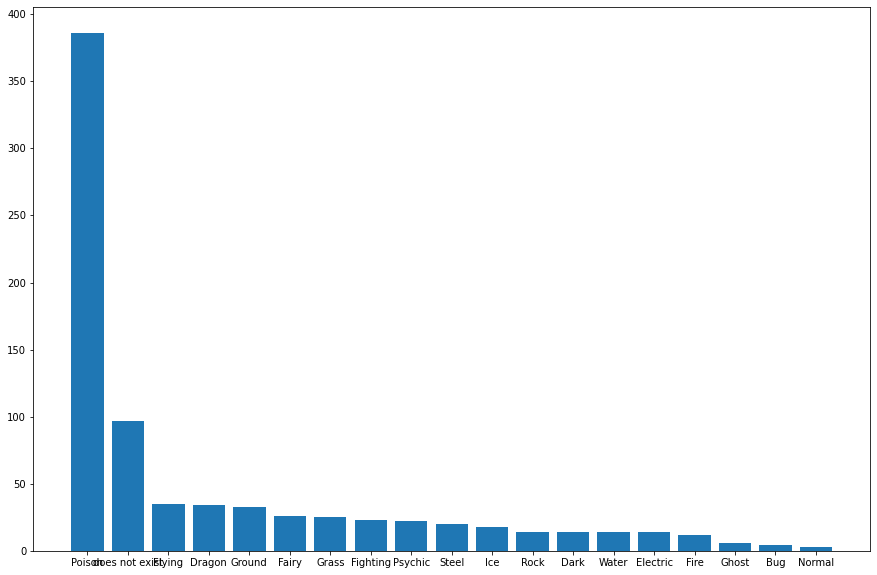

In [ ]:
#categorial variables (Type.2)
fig, ax = plt.subplots(figsize=(15,10))

X= df['Type.2'].unique() 
Y= df['Type.2'].value_counts()

print(X, Y)

ax.bar(X,Y)
plt.show()

header 2 

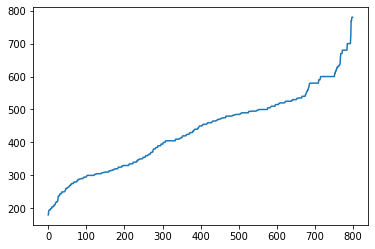

In [ ]:
# quantitative variables (total)// line graphs are good to explain quantitaive variables 
df.Total

sorted_total = df.Total.sort_values().values
plt.plot(sorted_total)




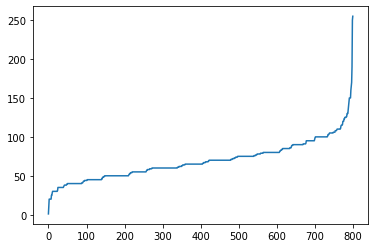

In [ ]:
#quantitative variables (HP)
df.HP

sorted_HP = df.HP.sort_values().values
plt.plot(sorted_HP)

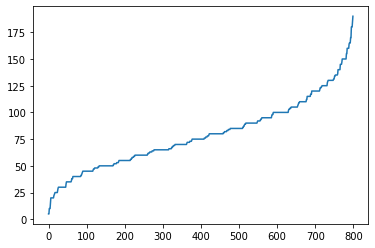

In [ ]:
#Attack
df.Attack

sorted_Attack = df.Attack.sort_values().values
plt.plot(sorted_Attack)


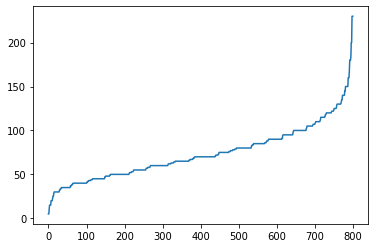

In [ ]:
#Defense

df.Defense

sorted_Defense = df.Defense.sort_values().values
plt.plot(sorted_Defense)


In [ ]:
# replacing columns name
df.rename(columns={'Sp..Atk': 'special_attack', 'Sp..Def': 'special_defence'}, inplace=True)
df

,Name,Type.1,Type.2,Total,HP,Attack,Defense,special_attack,special_defence,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,Charmander,Fire,does not exist,309,39,52,43,60,50,65,1,False,0.48,0.441195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,na,0.519051
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,na,0.519051
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,na,0.400652
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,na,0.400652


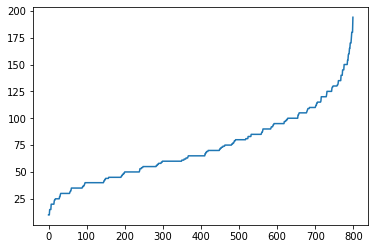

In [ ]:
#special_attack
df.special_attack

sorted_special_attack = df.special_attack.sort_values().values
plt.plot(sorted_special_attack)

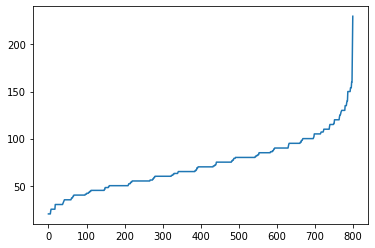

In [ ]:
#special_defence
df.special_defence

sorted_special_defence = df.special_defence.sort_values().values
plt.plot(sorted_special_defence)

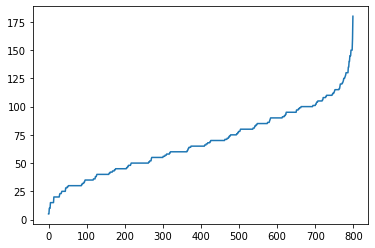

In [ ]:
#Speed
df.Speed

sorted_Speed = df.Speed.sort_values().values
plt.plot(sorted_Speed)


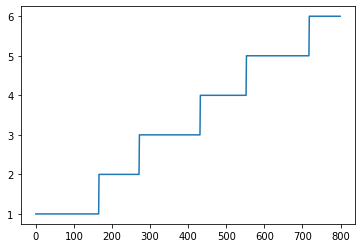

In [ ]:
#Generation
df.Generation

sorted_Generation = df.Generation.sort_values().values
plt.plot(sorted_Generation)


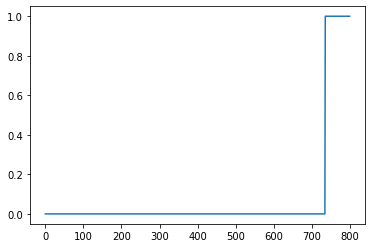

In [ ]:
#Legendary
df.Legendary

sorted_Legendary = df.Legendary.sort_values().values
plt.plot(sorted_Legendary)


In [ ]:
#replaced na with 0

df.Win_rate = df.Win_rate.astype(float).fillna(0.0)
df.Win_rate

0      0.17
1      0.36
2      0.63
3      0.58
4      0.48
       ... 
795    0.00
796    0.00
797    0.00
798    0.00
799    0.00
Name: Win_rate, Length: 800, dtype: float64

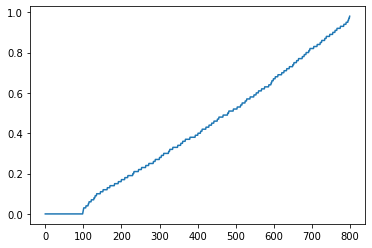

In [ ]:
#Winrate
df.Win_rate

sorted_Win_rate = df.Win_rate.sort_values().values
plt.plot(sorted_Win_rate)


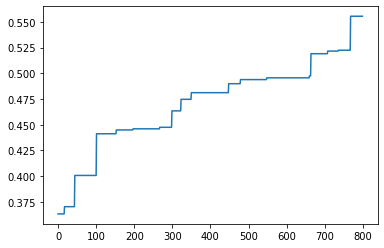

In [ ]:
#Type1_Win_rate
df.Type1_Win_rate

sorted_Type1_Win_rate = df.Type1_Win_rate.sort_values().values
plt.plot(sorted_Type1_Win_rate)


In [ ]:
df.skew()

Total              0.152530
HP                 1.568224
Attack             0.551614
Defense            1.155912
special_attack     0.744662
special_defence    0.854019
Speed              0.357933
Generation         0.014258
Legendary          3.071072
Win_rate           0.169988
Type1_Win_rate    -0.577035
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             800 non-null    object 
 1   Type.1           800 non-null    object 
 2   Type.2           800 non-null    object 
 3   Total            800 non-null    int64  
 4   HP               800 non-null    int64  
 5   Attack           800 non-null    int64  
 6   Defense          800 non-null    int64  
 7   special_attack   800 non-null    int64  
 8   special_defence  800 non-null    int64  
 9   Speed            800 non-null    int64  
 10  Generation       800 non-null    int64  
 11  Legendary        800 non-null    bool   
 12  Win_rate         800 non-null    float64
 13  Type1_Win_rate   800 non-null    float64
dtypes: bool(1), float64(2), int64(8), object(3)
memory usage: 82.2+ KB


In [ ]:
num_col=df.select_dtypes(np.number)
num_col.head()

,Total,HP,Attack,Defense,special_attack,special_defence,Speed,Generation,Win_rate,Type1_Win_rate
0,318,45,49,49,65,65,45,1,0.17,0.446002
1,405,60,62,63,80,80,60,1,0.36,0.446002
2,525,80,82,83,100,100,80,1,0.63,0.446002
3,625,80,100,123,122,120,80,1,0.58,0.446002
4,309,39,52,43,60,50,65,1,0.48,0.441195


0.1525299233953993


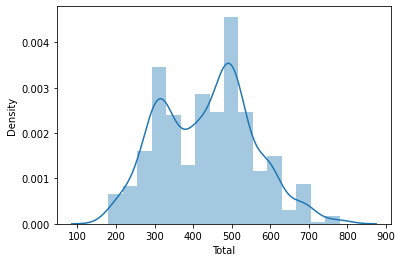

1.5682243758418617


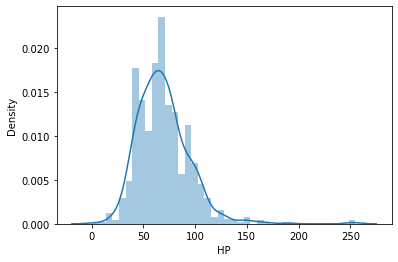

0.5516137480269772


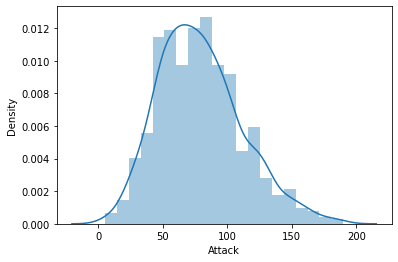

1.1559123029560856


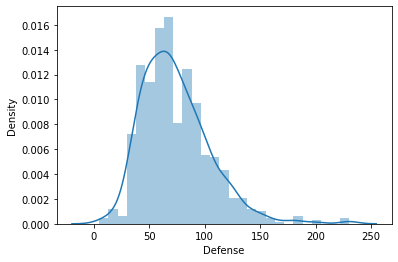

0.7446624978300574


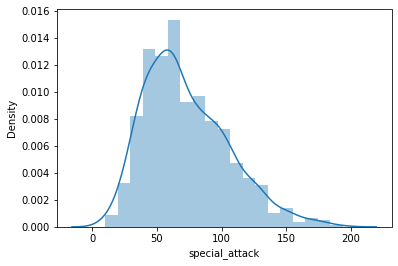

0.8540186115468782


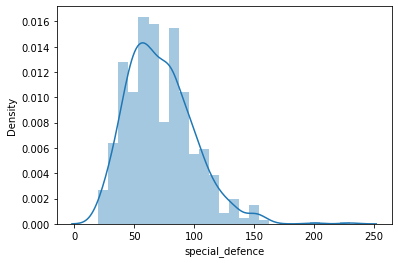

0.35793329506082994


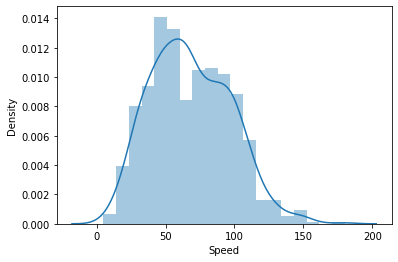

0.014258100279990539


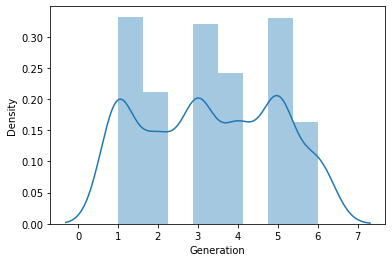

0.16998756191011613


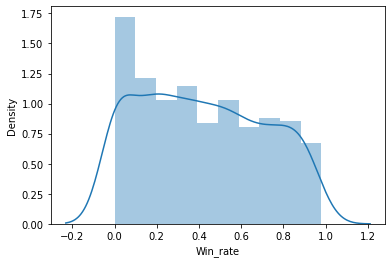

-0.5770352650898497


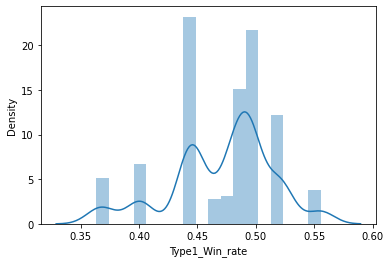

In [ ]:
for i in num_col.columns:
  sns.distplot(df[i])
  print(df[i].skew())
  plt.show()

header 3

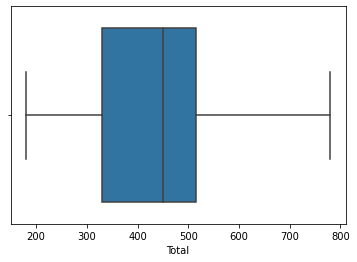

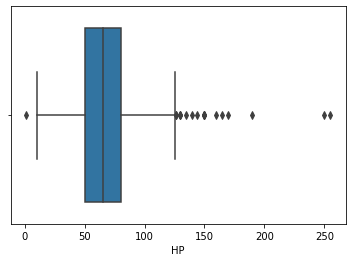

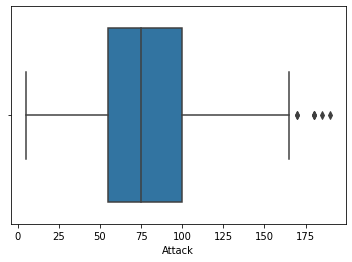

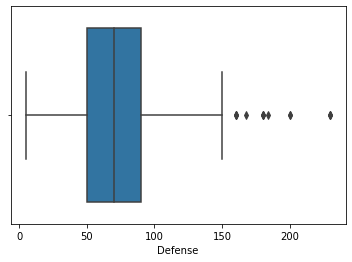

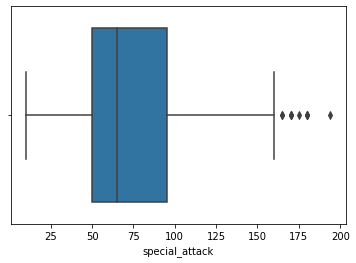

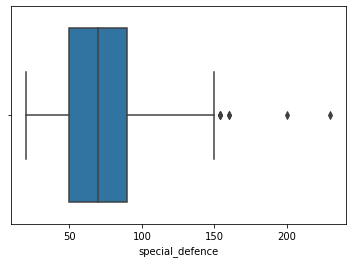

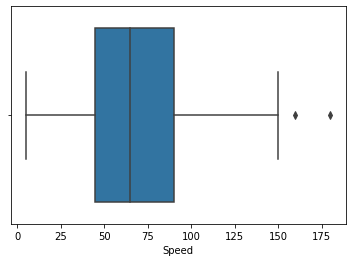

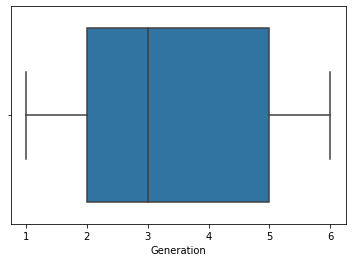

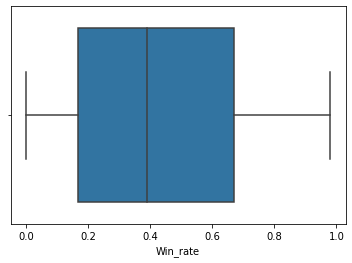

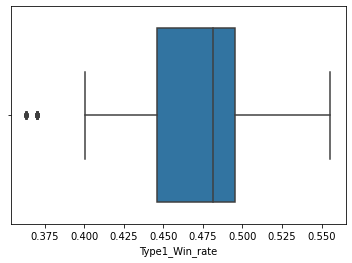

In [ ]:
for i in num_col.columns:
  sns.boxplot(df[i])
  plt.show()

task 4 header 2

In [ ]:
df.select_dtypes(include='object')

,Name,Type.1,Type.2
0,Bulbasaur,Grass,Poison
1,Ivysaur,Grass,Poison
2,Venusaur,Grass,Poison
3,VenusaurMega Venusaur,Grass,Poison
4,Charmander,Fire,does not exist
...,...,...,...
795,Diancie,Rock,Fairy
796,DiancieMega Diancie,Rock,Fairy
797,HoopaHoopa Confined,Psychic,Ghost
798,HoopaHoopa Unbound,Psychic,Dark


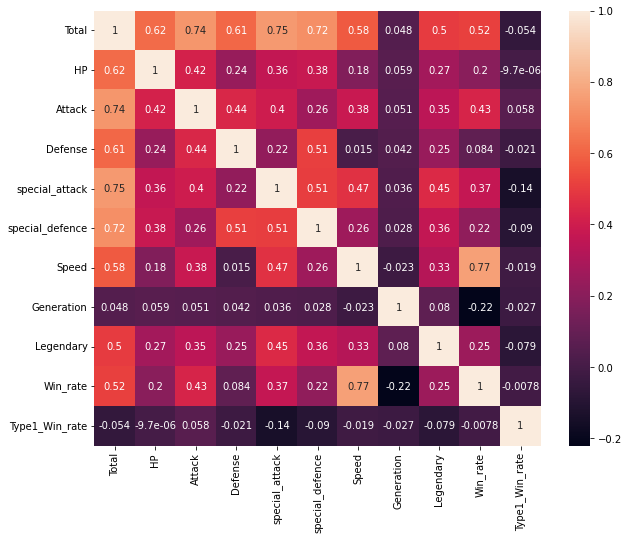

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

header 3

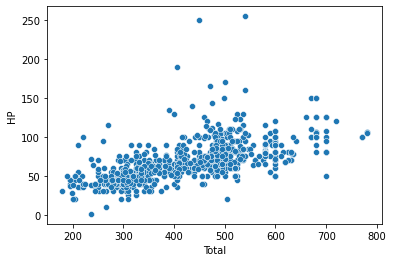

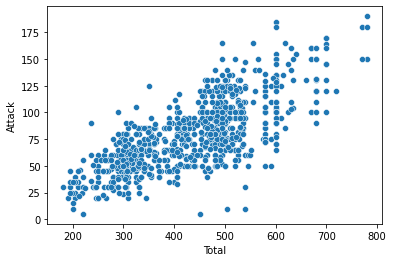

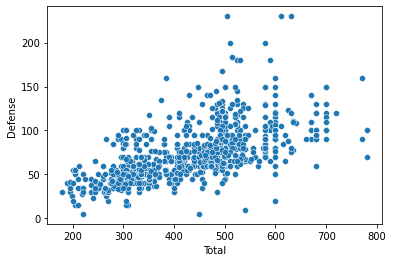

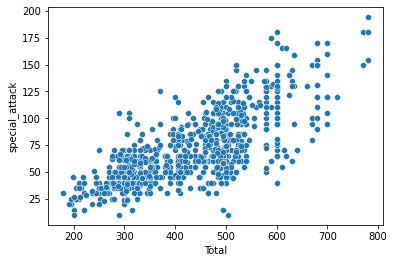

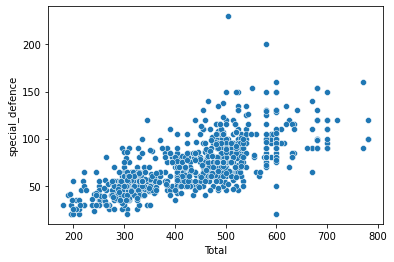

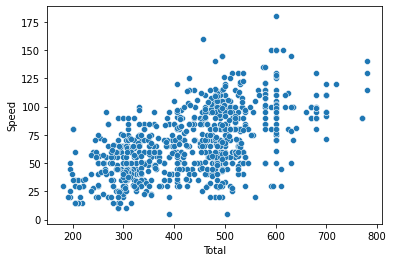

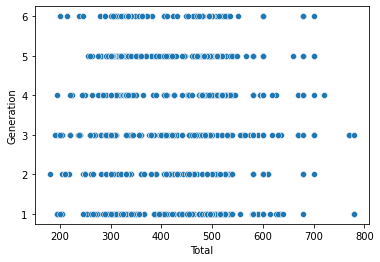

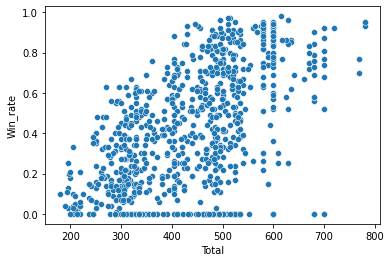

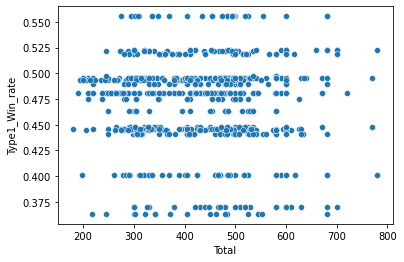

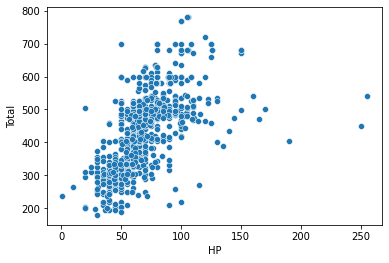

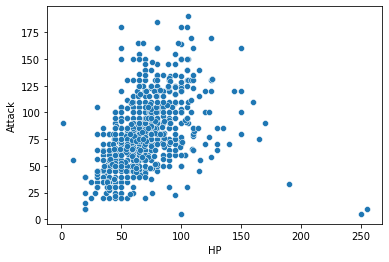

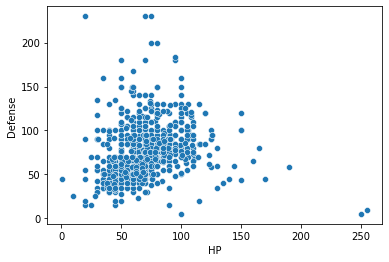

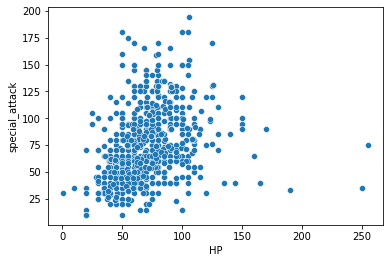

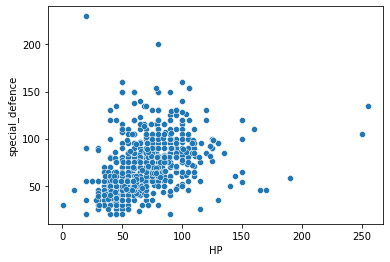

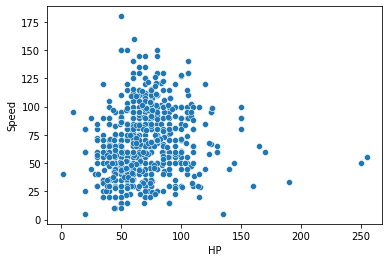

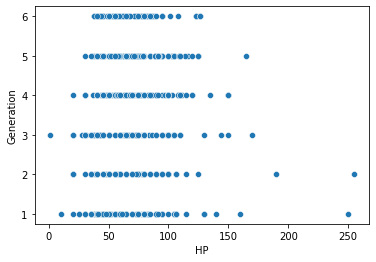

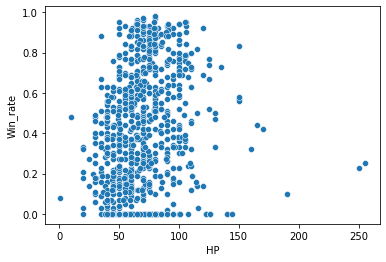

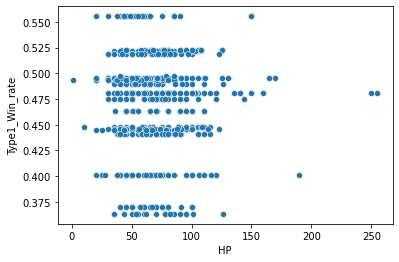

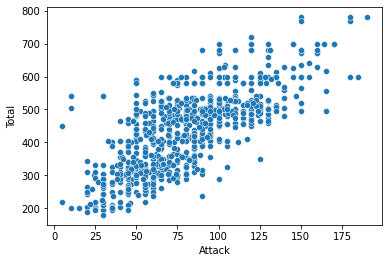

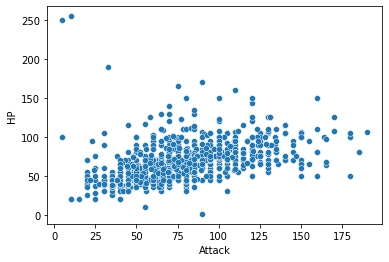

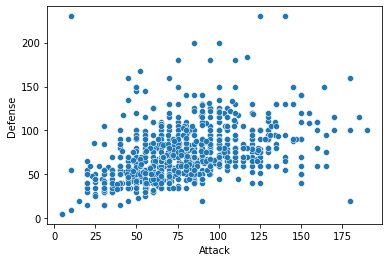

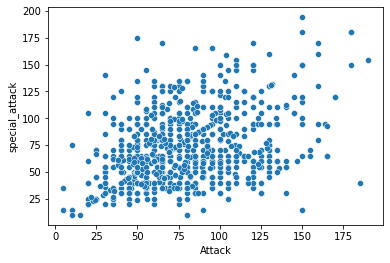

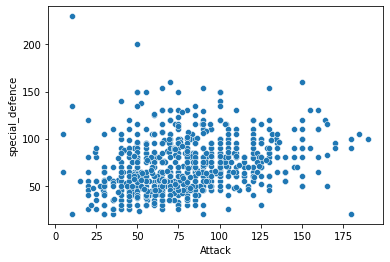

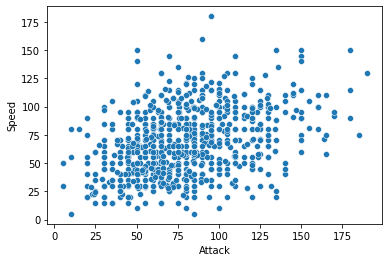

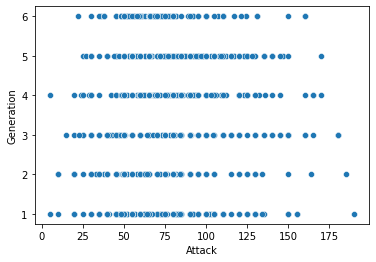

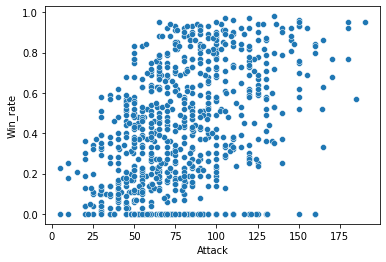

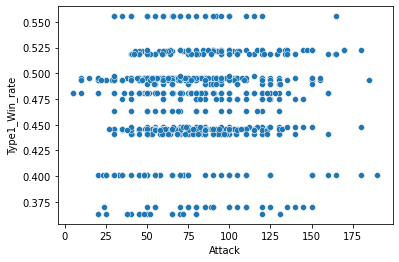

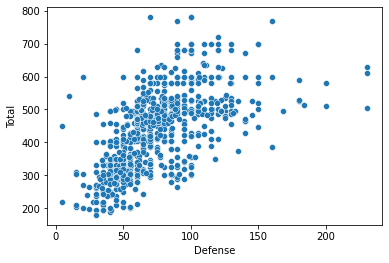

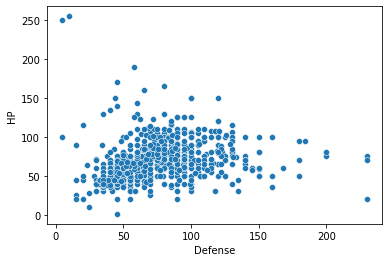

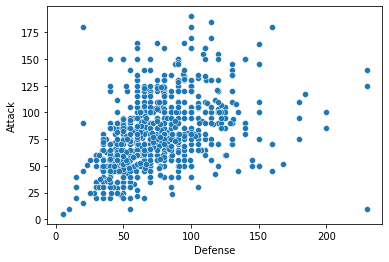

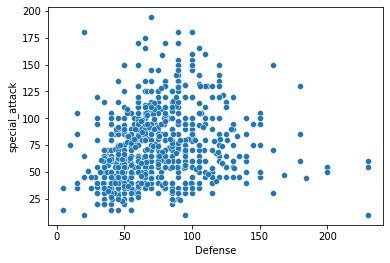

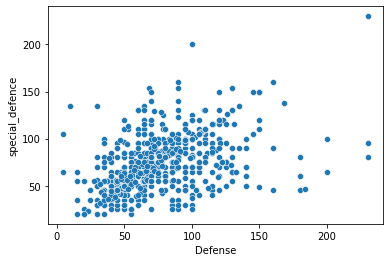

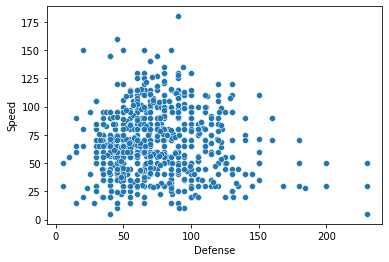

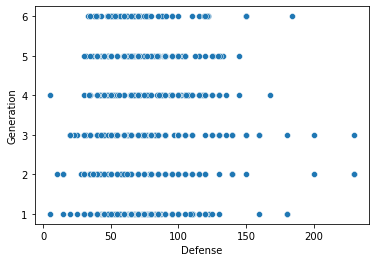

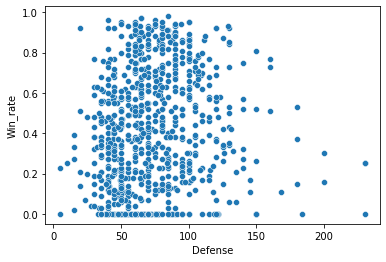

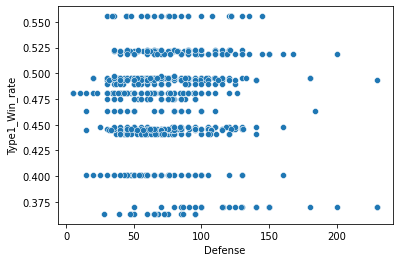

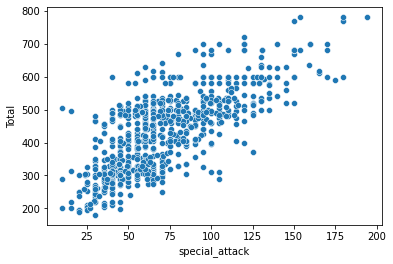

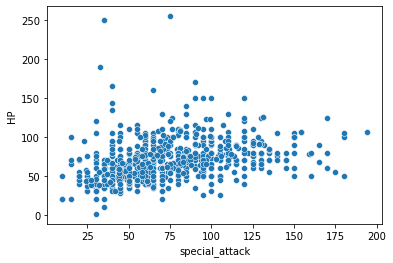

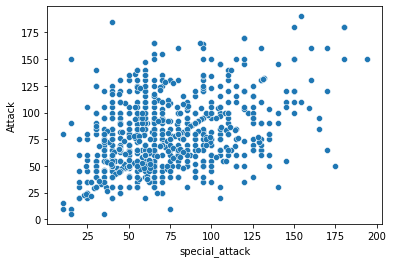

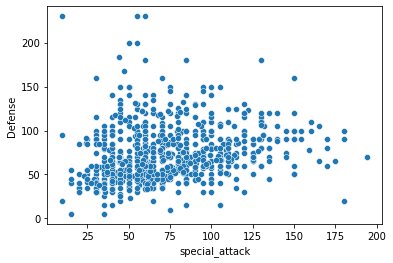

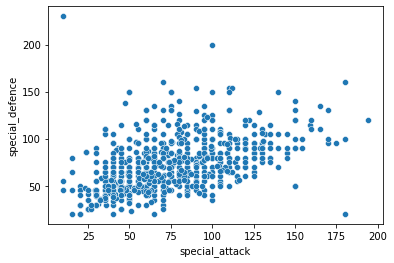

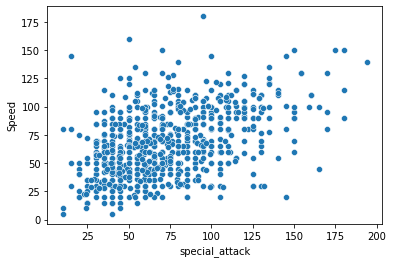

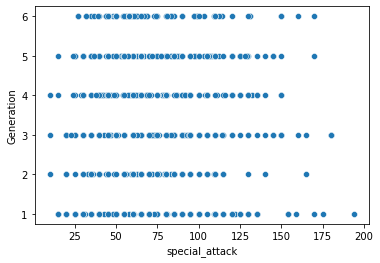

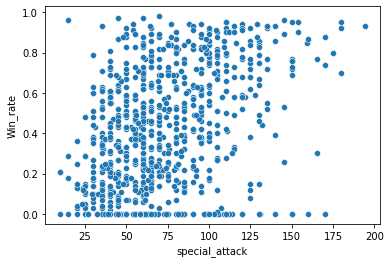

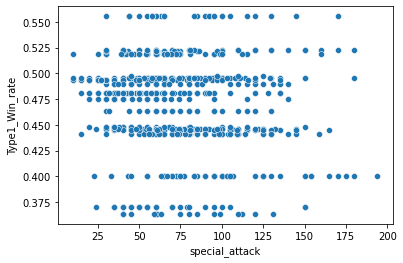

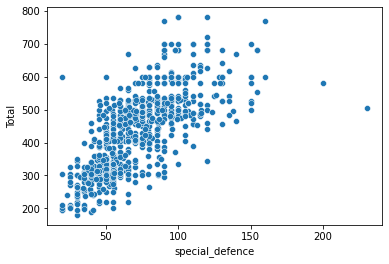

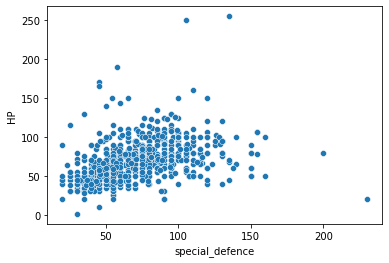

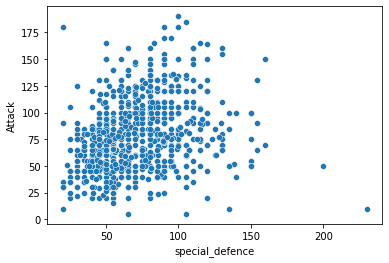

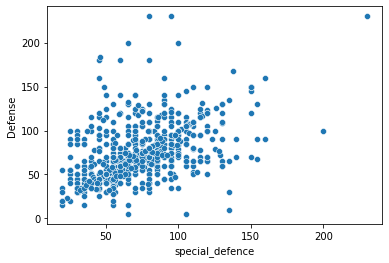

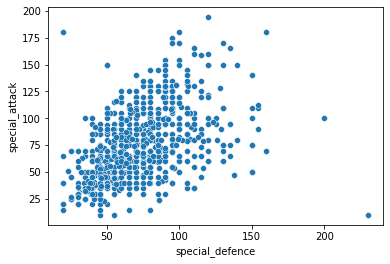

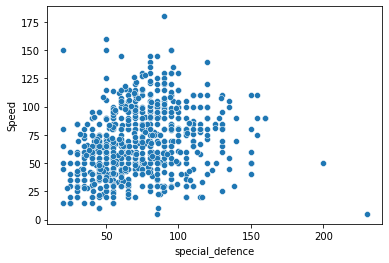

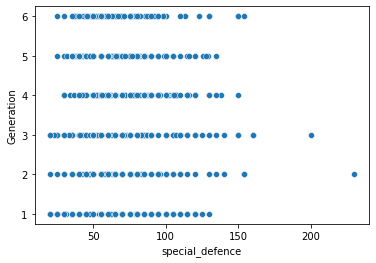

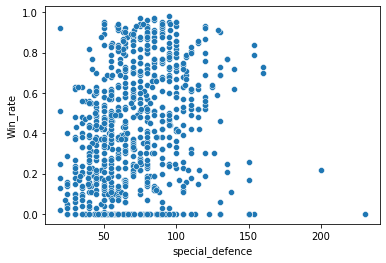

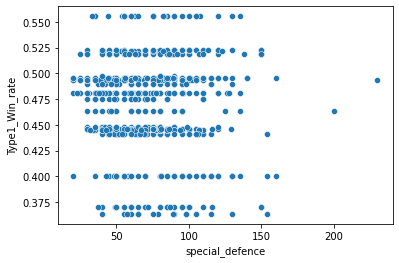

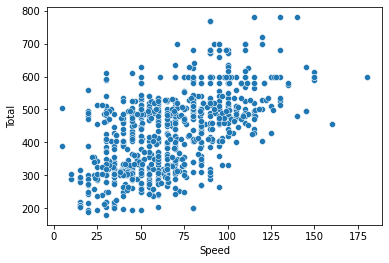

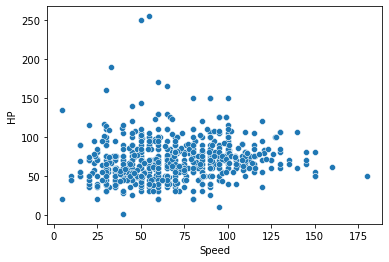

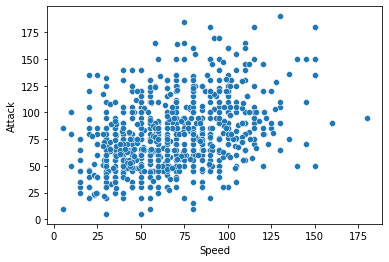

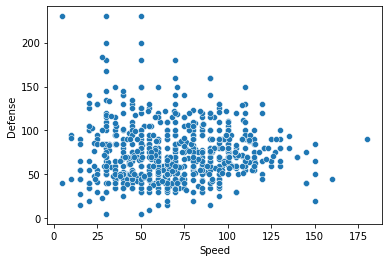

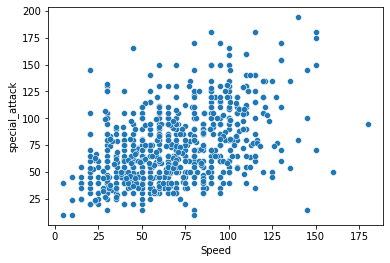

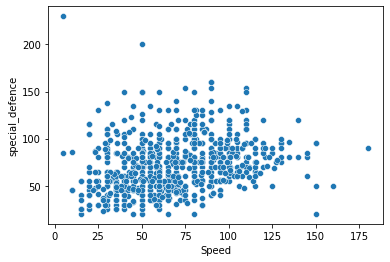

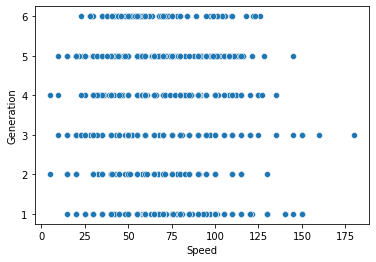

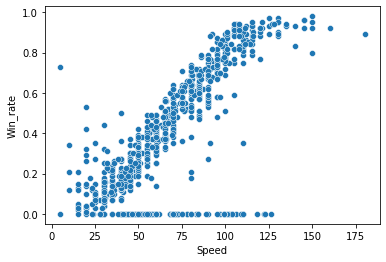

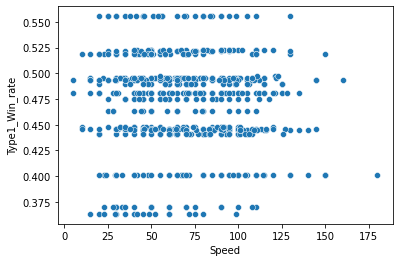

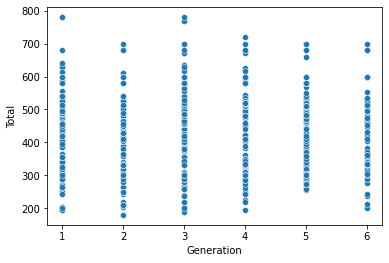

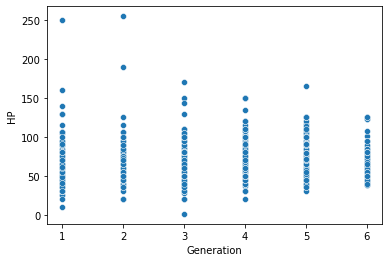

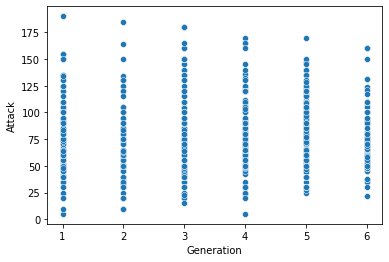

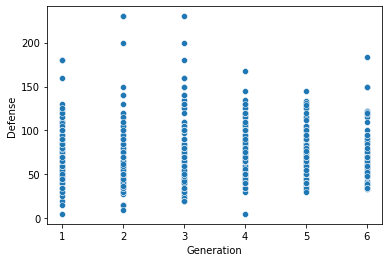

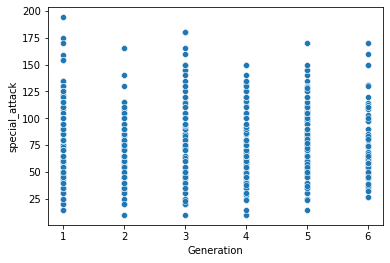

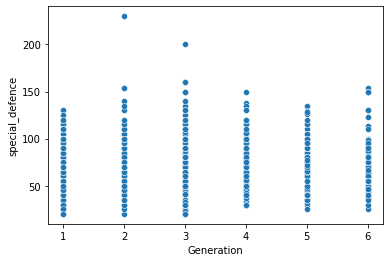

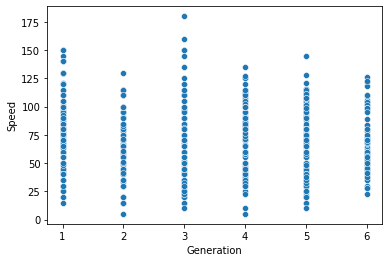

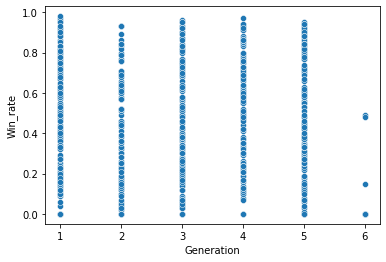

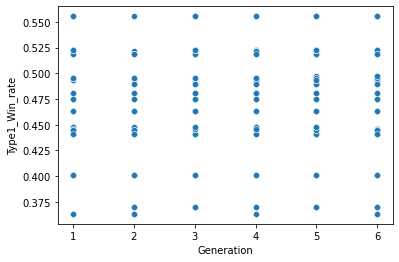

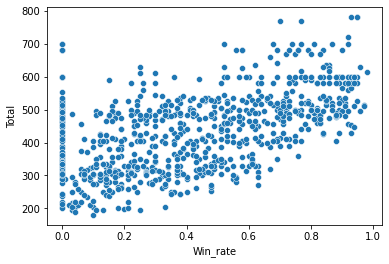

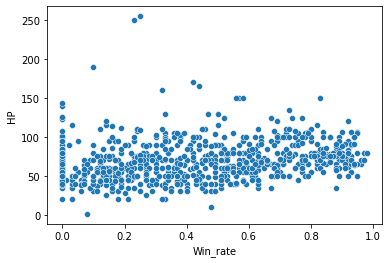

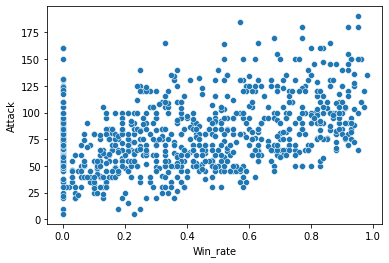

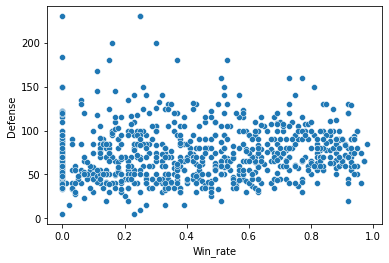

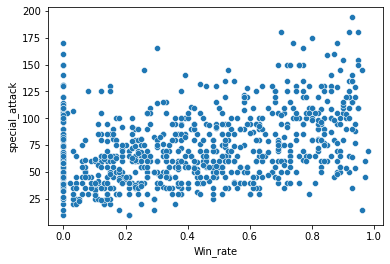

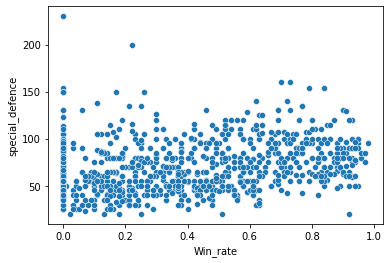

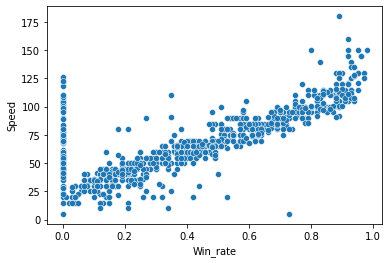

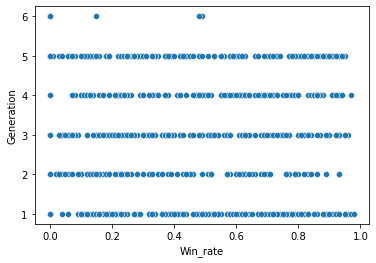

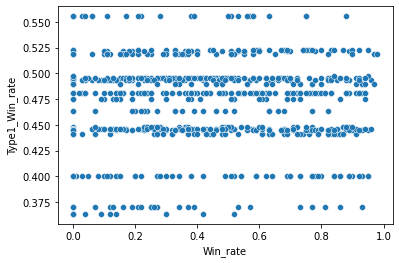

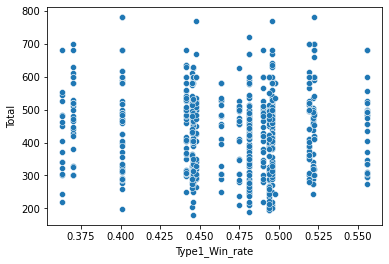

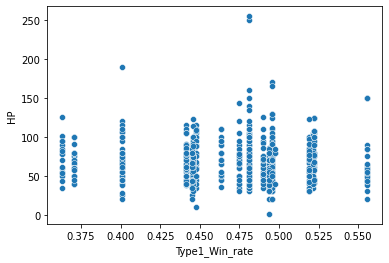

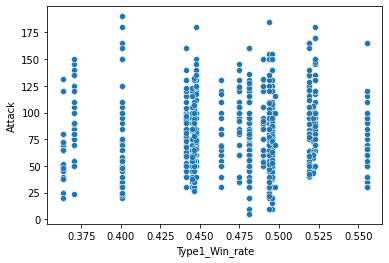

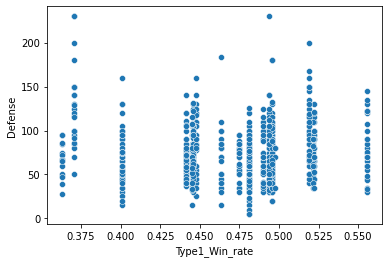

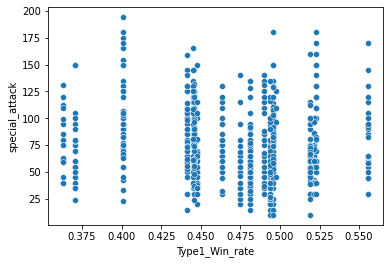

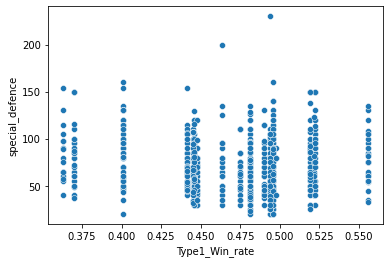

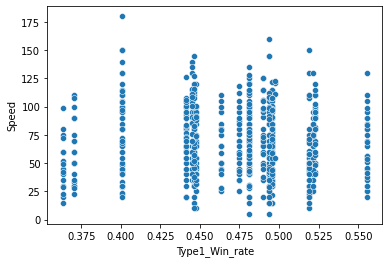

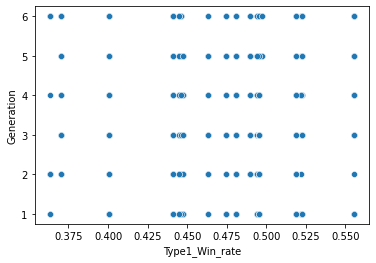

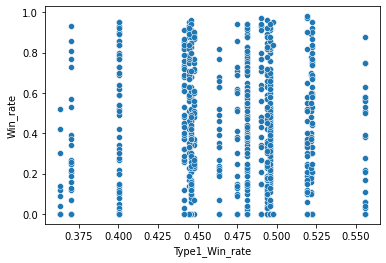

In [ ]:
for i in num_col.columns:
  for j in num_col.columns:
    if(i!=j):
      sns.scatterplot(df[i],df[j])
      plt.show()

header 5

For Type.1


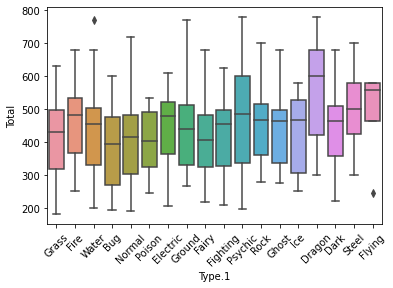

For Type.1


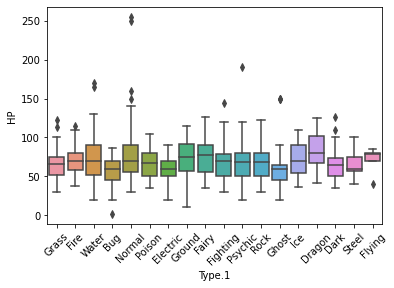

For Type.1


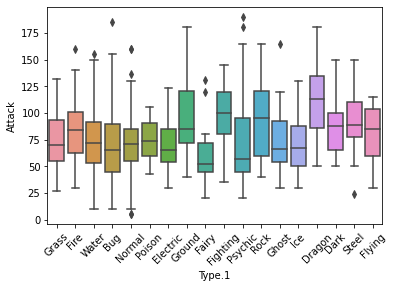

For Type.1


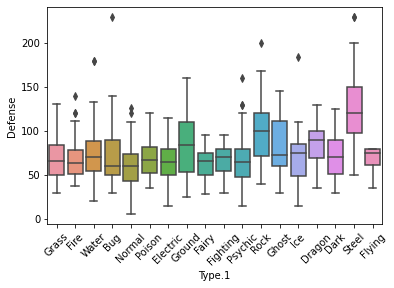

For Type.1


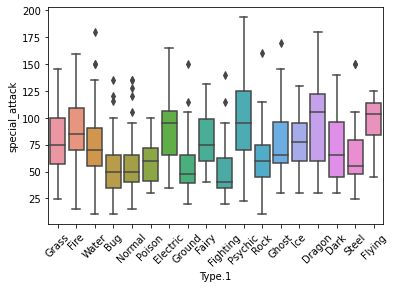

For Type.1


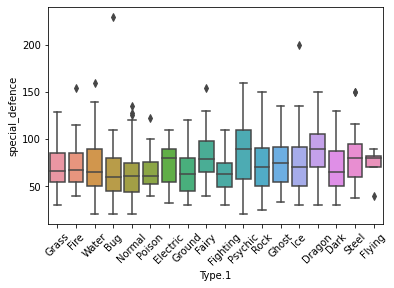

For Type.1


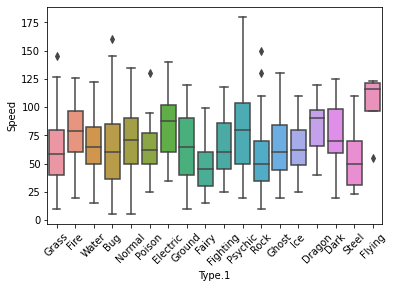

For Type.1


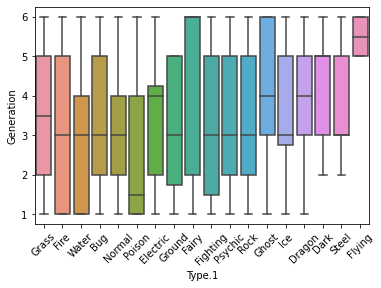

For Type.1


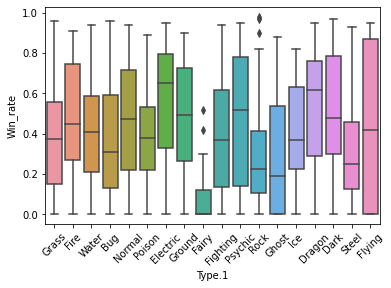

For Type.1


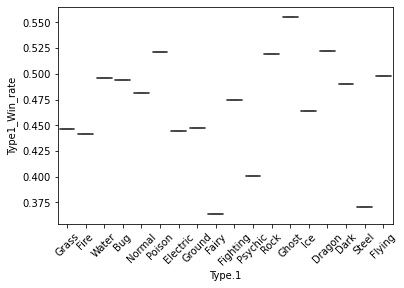

For Type.2


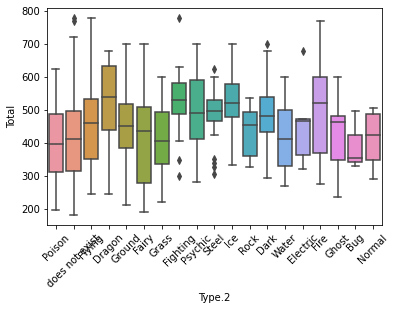

For Type.2


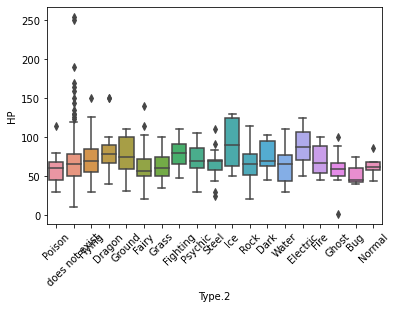

For Type.2


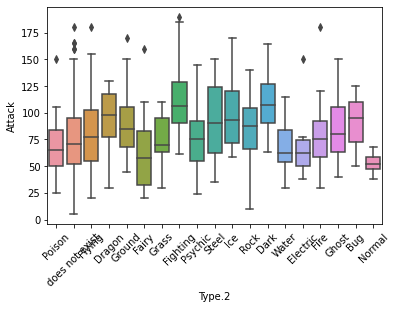

For Type.2


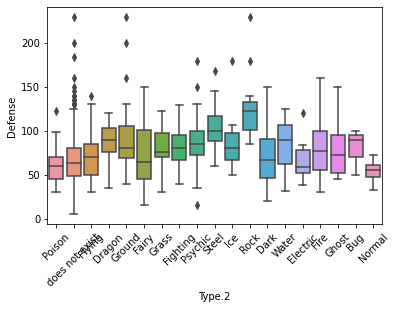

For Type.2


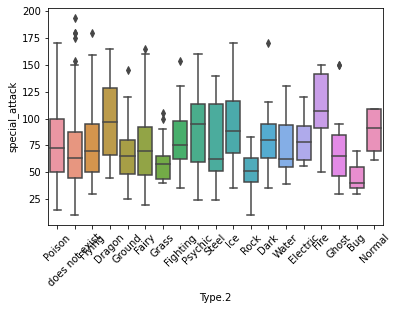

For Type.2


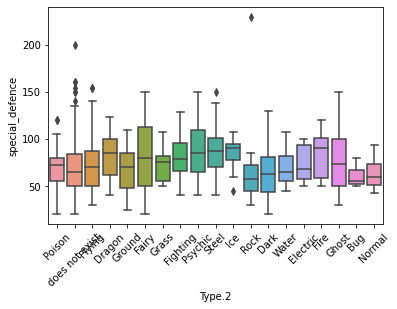

For Type.2


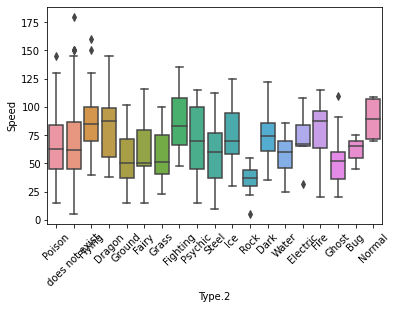

For Type.2


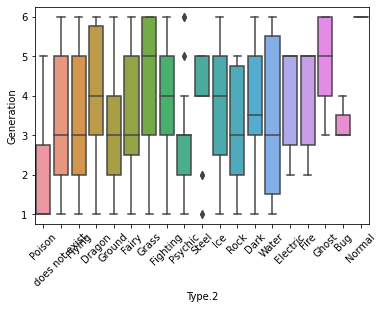

For Type.2


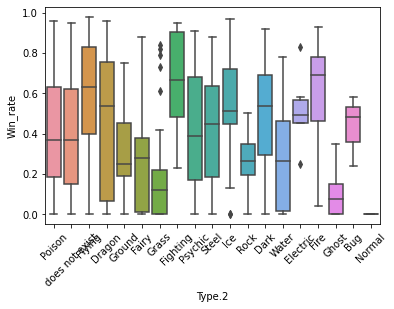

For Type.2


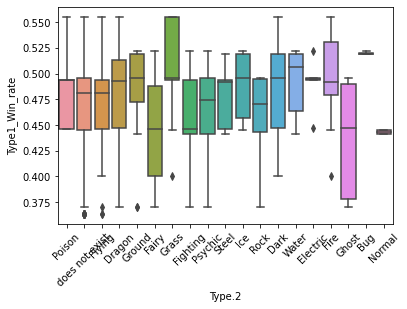

In [ ]:
for i in ['Type.1','Type.2']:
  for j in num_col.columns:
    print('For',i)
    sns.boxplot(df[i],df[j])
    plt.xticks(rotation=45)
    plt.show()


task 5

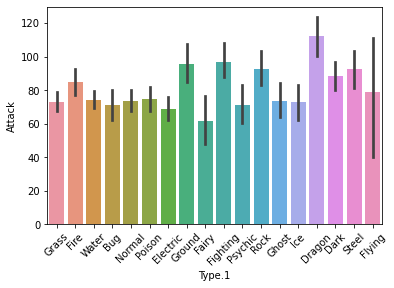

In [ ]:
sns.barplot(df['Type.1'],df['Attack'])
plt.xticks(rotation=45)
plt.show()